# P3C2 Améliorez un jeu de données

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/blob/master/notebooks/P3C2_ameliorer_dataset.ipynb)

Dans ce notebook nous allons nous attaquer aux problèmes des données manquantes  et à celui des outliers (données aberrantes)

Nous travaillons sur le dataset des arbres de Paris


Vous trouverez les versions suivantes du datasets

- sur le site [opendata de Paris](https://opendata.paris.fr/explore/dataset/les-arbres/information)
- version [brute](https://github.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/blob/master/data/paris-arbres-2023-09-07.csv) extraite le 10-09-2023, le séparateur est ';'
- version [exploitable](https://github.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/blob/master/data/paris-arbres-clean-2023-09-10.csv): les colonnes ont été renommées, le séparateur est ','


Ici nous travaillons sur cette version _exploitable_


In [354]:
import pandas as pd
import matplotlib.pyplot as plt

In [355]:
dataset_url = "https://raw.githubusercontent.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/master/data/paris-arbres-clean-2023-09-10.csv"
df = pd.read_csv(dataset_url)

/var/folders/31/b9pwgxyd4rz86p81hzwb44bm0000gn/T/ipykernel_25236/3948492116.py:2: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_url)


En résumé nous obtenons un dataset

- 221201 échantillons
- 16 colonnes
- les variables suivantes:
    - localisation: domanialite, arrondissement, complement_adresse, numero, lieu_adresse, geo_point_2d
    - nature des arbres: libelle_francais, genre, espece, variete_oucultivar, remarquable
    - les mensurations:  circonference_cm et hauteur_m, stade_de_developpement
    - les ID: idbase, idemplacement
 

In [356]:
df.head()

,idbase,domanialite,arrondissement,complement_adresse,numero,lieu_adresse,idemplacement,libelle_francais,genre,espece,variete_oucultivar,circonference_cm,hauteur_m,stade_de_developpement,remarquable,geo_point_2d
0,256032,Alignement,PARIS 14E ARRDT,NaN,NaN,RUE VERCINGETORIX,000602025,Erable,Acer,pseudoplatanus,''Atropurpureum'',70.0,6.0,Jeune (arbre),NON,"48.83154687478726, 2.3093726893065596"
1,281618,Alignement,PARIS 8E ARRDT,NaN,NaN,AVENUE DES CHAMPS ELYSEES,000305044,Marronnier,Aesculus,hippocastanum,''Baumannii'',20.0,4.0,Jeune (arbre),NON,"48.86665704304558, 2.3162802812024443"
2,302647,Jardin,PARIS 8E ARRDT,Secteur Kiosque,NaN,JARDINS DES CHAMPS ELYSEES - ABORDS DU KIOSQUE...,000109003,If,Taxus,baccata,NaN,50.0,5.0,Jeune (arbre)Adulte,NON,"48.86594098488487, 2.3177825326579695"
3,238226,Alignement,PARIS 12E ARRDT,37,NaN,AVENUE DE SAINT MANDE,000501020,Platane,Platanus,x hispanica,NaN,30.0,5.0,Jeune (arbre),NON,"48.84515461889761, 2.4008303350818525"
4,110978,Jardin,PARIS 19E ARRDT,NaN,NaN,PARC DES BUTTES CHAUMONT,K69K0040,Pin,Pinus,nigra,NaN,100.0,10.0,NaN,NaN,"48.87971709048107, 2.3797109748696337"


In [357]:
df.shape

(221201, 16)

In [358]:
df.columns

Index(['idbase', 'domanialite', 'arrondissement', 'complement_adresse',
       'numero', 'lieu_adresse', 'idemplacement', 'libelle_francais', 'genre',
       'espece', 'variete_oucultivar', 'circonference_cm', 'hauteur_m',
       'stade_de_developpement', 'remarquable', 'geo_point_2d'],
      dtype='object')

In [359]:
df.describe()

,circonference_cm,hauteur_m
count,207640.000000,207640.000000
mean,81.139703,8.817737
std,62.986148,6.128331
min,0.000000,0.000000
25%,30.000000,5.000000
50%,70.000000,8.000000
75%,115.000000,12.000000
max,1680.000000,710.000000


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221201 entries, 0 to 221200
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   idbase                  221201 non-null  object 
 1   domanialite             221201 non-null  object 
 2   arrondissement          221201 non-null  object 
 3   complement_adresse      58957 non-null   object 
 4   numero                  1 non-null       object 
 5   lieu_adresse            221200 non-null  object 
 6   idemplacement           207641 non-null  object 
 7   libelle_francais        206436 non-null  object 
 8   genre                   207638 non-null  object 
 9   espece                  205163 non-null  object 
 10  variete_oucultivar      39718 non-null   object 
 11  circonference_cm        207640 non-null  float64
 12  hauteur_m               207640 non-null  float64
 13  stade_de_developpement  160839 non-null  object 
 14  remarquable         

In [361]:
df.domanialite.value_counts(dropna = False)

domanialite
Alignement      107115
Jardin           63467
CIMETIERE        31920
DASCO             7249
PERIPHERIQUE      5225
DJS               4732
DFPE              1408
DAC                 66
DASES               18
000101001            1
Name: count, dtype: int64

In [362]:
df.espece.value_counts(dropna = False)

espece
x hispanica      36687
hippocastanum    19898
NaN              16038
japonicum        11905
tomentosa         8992
                 ...  
cathayana            1
pekinensis           1
vilmorinii           1
henryi               1
macrophyllum         1
Name: count, Length: 560, dtype: int64

In [363]:
df.stade_de_developpement.value_counts(dropna = False)

stade_de_developpement
Adulte                 78454
NaN                    60362
Jeune (arbre)Adulte    38503
Jeune (arbre)          36476
Mature                  7406
Name: count, dtype: int64

# Les platanes

Nous travaillons sur un subset composé uniquement des Platanes, soit 42588 arbres

In [364]:
df = df[df.libelle_francais == 'Platane'].copy()

df.shape

(42588, 16)

la variable stade_de_developpement a 3350 valeurs manquantes (NaN)


In [365]:
df.stade_de_developpement.value_counts(dropna = False)

stade_de_developpement
Adulte                 21620
Jeune (arbre)Adulte     8356
Jeune (arbre)           5916
NaN                     3350
Mature                  3346
Name: count, dtype: int64

On suppose que la valeur _Jeune (arbre)Adulte_ est une valeur intermédiaire entre les catégories _Jeune (arbre)_ et _Adulte_. 

On a donc la graduation: Jeune (arbre), Jeune (arbre)Adulte, Adulte puis Mature.

## Visualisation

Regardons la distribution de la hauteur et circonference en fonction des stades de developpement

Pour une meilleure figure:

- Ordonnons tout d'abord le dataset en fonction de l'ordre de la variable stade_de_développement
- Enlevons les valeurs manquantes de stade_de_developpement
- limitons les mensurations


In [366]:

cats = ['Jeune (arbre)', 'Jeune (arbre)Adulte', 'Adulte', 'Mature']

for n, cat in zip(range(1, 5), cats):
    df.loc[df.stade_de_developpement == cat, 'stade_num'] = n
df.sort_values(by = 'stade_num', inplace = True)
df.reset_index(inplace = True, drop = True)

In [367]:
cond = ~df.stade_de_developpement.isna() & (df.circonference_cm < 400) & (df.hauteur_m < 40)

df[cond].shape

(39119, 17)

Voici les boxplot des hauteur_m et circonference_cm 

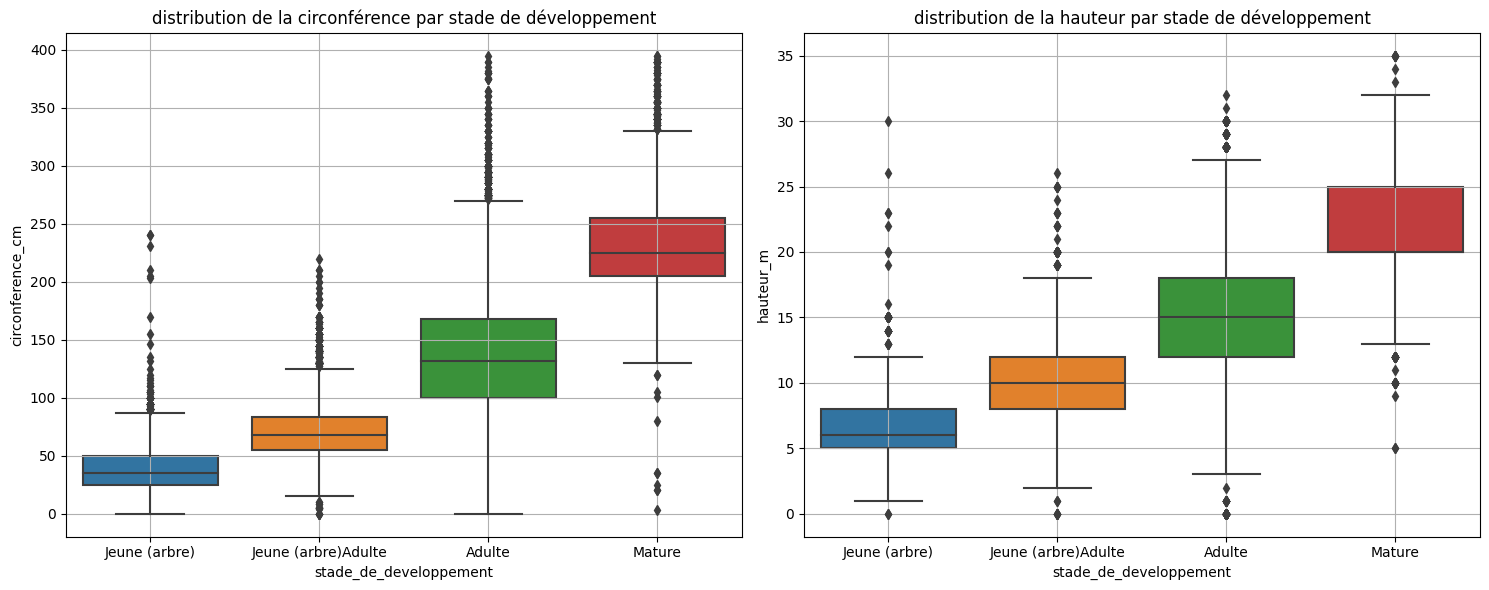

In [368]:
import seaborn as sns

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 2, 1)
sns.boxplot(data = df[cond], y="circonference_cm", x="stade_de_developpement")
ax.grid(True, which = 'both')
ax.set_title('distribution de la circonférence par stade de développement')

ax = fig.add_subplot(1, 2, 2)
sns.boxplot(data = df[cond], y="hauteur_m", x="stade_de_developpement")
ax.grid(True, which = 'both')
ax.set_title('distribution de la hauteur par stade de développement')

plt.tight_layout()

A partir de ces visualisations,  nous pouvons choisir des seuils de hauteur et de circonference pour determiner le stade de  developpement de l'arbre. 

## Inferer les valeurs manquantes par une regression

Construisons maintenant une regression logistique pour determiner le seuil de developpement de l'arbre en fonction de ses mensurations

state_de_developpement ~ hauteur_n + circonference_cm


In [369]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cond = ~df.stade_de_developpement.isna()

X = df[cond][['hauteur_m','circonference_cm']]
y = df[cond].stade_num

# Scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

clf = LogisticRegression(random_state = 0).fit(X_train,y_train)

print(f"Score de la classification R^2: ", clf.score(X_test, y_test))

Score de la classification R^2:  0.7385321100917431


In [370]:
# classification report

from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.80      0.71      0.75      1172
         2.0       0.65      0.38      0.48      1628
         3.0       0.74      0.96      0.84      4386
         4.0       0.73      0.19      0.30       662

    accuracy                           0.74      7848
   macro avg       0.73      0.56      0.59      7848
weighted avg       0.73      0.74      0.71      7848



Regardons maintenant combien d'arbres dont le stade_de_developpement est manquant seraient classés par stade de developpement

In [371]:
X_missing = scaler.transform( df[~cond][['hauteur_m','circonference_cm']]   )

y_missing = clf.predict(X_missing)



In [372]:
y_missing

array([3., 1., 1., ..., 1., 1., 1.])

In [373]:
import numpy as np
np.unique(y_missing, return_counts=True)[1]


array([2913,   23,  382,   32])

soit 2913 Jeune arbres, 24 Jeunes arbres (Adulte), 385 Adulte et 32 Mature

# Autres exemples de données manquantes

Il se trouve que 1688 platanes ont une hauteur nulle (égale à 0) et 1592 ont une circonférence aussi égale à 0

En ce qui concerne la hauteur, il se peut que cela soit dû à la discrétisation observée précédemment et donc au mode de mesure utilisé. 

Pour la circonférence par contre, ces valeurs nulles sont plus probablement des valeurs manquantes.

Comment remplaceriez-vous ces valeurs nulles (=0) par des valeurs qui font sens ?



In [374]:
df[df.hauteur_m ==  0].shape

(1688, 17)

In [375]:
df[df.circonference_cm ==  0].shape

(1592, 17)

In [376]:
df[(df.circonference_cm ==  0) & (df.hauteur_m == 0)].shape

(1591, 17)

99% des arbres dont la circonference est nulle ont aussi une hauteur nulle. On ne peut donc pas utiliser une des variables pour prédire l'autre. 

In [377]:
df[(df.circonference_cm ==  0) & (df.hauteur_m == 0)].stade_de_developpement.value_counts(dropna = False)

stade_de_developpement
NaN                    1546
Adulte                   40
Jeune (arbre)Adulte       4
Jeune (arbre)             1
Name: count, dtype: int64

De plus la plupart ont aussi des données manquantes quant à leur stade de développement.

Les autres variables, notamment celles de geo localisation ou relevant de la nature de l'arbre  sont bien renseignées.

In [378]:
df[ df.stade_de_developpement.isna() & (df.circonference_cm ==  0) & (df.hauteur_m == 0)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1546 entries, 39239 to 42586
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idbase                  1546 non-null   object 
 1   domanialite             1546 non-null   object 
 2   arrondissement          1546 non-null   object 
 3   complement_adresse      9 non-null      object 
 4   numero                  0 non-null      object 
 5   lieu_adresse            1546 non-null   object 
 6   idemplacement           1546 non-null   object 
 7   libelle_francais        1546 non-null   object 
 8   genre                   1546 non-null   object 
 9   espece                  1546 non-null   object 
 10  variete_oucultivar      0 non-null      object 
 11  circonference_cm        1546 non-null   float64
 12  hauteur_m               1546 non-null   float64
 13  stade_de_developpement  0 non-null      object 
 14  remarquable             496 non-null    

In [379]:
df[ df.stade_de_developpement.isna() & (df.circonference_cm ==  0) & (df.hauteur_m == 0)].sample(n = 5, random_state = 88)

,idbase,domanialite,arrondissement,complement_adresse,numero,lieu_adresse,idemplacement,libelle_francais,genre,espece,variete_oucultivar,circonference_cm,hauteur_m,stade_de_developpement,remarquable,geo_point_2d,stade_num
42272,162403,CIMETIERE,SEINE-SAINT-DENIS,NaN,NaN,CIMETIERE DE PANTIN / AVENUE DES PLATANES D''O...,A08200038011,Platane,Platanus,orientalis,NaN,0.0,0.0,NaN,NaN,"48.90498741627846, 2.4052840516329304",NaN
41074,161434,CIMETIERE,VAL-DE-MARNE,NaN,NaN,CIMETIERE DE THIAIS / AVENUE TRANSVERSALE N2 /...,A15000090004,Platane,Platanus,orientalis,NaN,0.0,0.0,NaN,NaN,"48.76022520366984, 2.3817397814979646",NaN
39516,160888,CIMETIERE,SEINE-SAINT-DENIS,NaN,NaN,CIMETIERE DE PANTIN / AVENUE DES PLATANES D''O...,A08100159010,Platane,Platanus,occidentalis,NaN,0.0,0.0,NaN,NaN,"48.90677221853682, 2.4212057059656047",NaN
41306,160960,CIMETIERE,SEINE-SAINT-DENIS,NaN,NaN,CIMETIERE DE PANTIN / AVENUE DES PLATANES D''O...,A08100156005,Platane,Platanus,occidentalis,NaN,0.0,0.0,NaN,NaN,"48.90486001909787, 2.4189557001016553",NaN
42080,160928,CIMETIERE,SEINE-SAINT-DENIS,NaN,NaN,CIMETIERE DE PANTIN / AVENUE DES PLATANES D''O...,A08100154003,Platane,Platanus,occidentalis,NaN,0.0,0.0,NaN,NaN,"48.90581829682974, 2.420010667332934",NaN


In [380]:
df[ df.stade_de_developpement.isna() & (df.circonference_cm ==  0) & (df.hauteur_m == 0)].domanialite.value_counts(dropna = False)

domanialite
CIMETIERE       1465
Jardin            53
Alignement        22
PERIPHERIQUE       6
Name: count, dtype: int64

In [381]:
df[ df.stade_de_developpement.isna() & (df.circonference_cm ==  0) & (df.hauteur_m == 0)].lieu_adresse.value_counts(dropna = False).head(40)

lieu_adresse
CIMETIERE DE BAGNEUX / AVENUE PRINCIPALE / DIV 98                  23
CIMETIERE DE BAGNEUX / AVENUE PRINCIPALE / DIV 68                  22
CIMETIERE DE BAGNEUX / AVENUE PRINCIPALE / DIV 20                  21
CIMETIERE DE BAGNEUX / AVENUE PRINCIPALE / DIV 21                  21
CIMETIERE DE BAGNEUX / AVENUE PRINCIPALE / DIV 104                 20
CIMETIERE DE BAGNEUX / AVENUE PRINCIPALE / DIV 99                  20
CIMETIERE DE BAGNEUX / AVENUE PRINCIPALE / DIV 91                  20
AVENUE DUQUESNE                                                    20
CIMETIERE DE BAGNEUX / AVENUE PRINCIPALE / DIV 76                  20
CIMETIERE DE BAGNEUX / AVENUE PRINCIPALE / DIV 52                  19
CIMETIERE DE BAGNEUX / AVENUE PRINCIPALE / DIV 84                  19
CIMETIERE DE BAGNEUX / AVENUE PRINCIPALE / DIV 69                  19
CIMETIERE DE BAGNEUX / AVENUE PRINCIPALE / DIV 92                  19
CIMETIERE DE BAGNEUX / AVENUE PRINCIPALE / DIV 60                  19
CIMETIE

la plupart de ces  arbres sont dans des cimetieres.  Et il semble que google maps n'offre pas de street view pour ces lieux: CIMETIERE DE BAGNEUX  ou CIMETIERE DE THIAIS. Donc pas moyen de savoir si ces arbres sont par exemple jeunes ou remarquables.


Donc à  ce stade il semble que nous n'ayons pas d'autre choix que de supprimer ces echantillons. Il n'est pas possible  d'inferer les valeurs manquantes à partir des autres valeurs ou de données complementaires.

# Outliers

Regardons les outliers au niveau des mensurations des arbres

In [382]:
dataset_url = "https://raw.githubusercontent.com/OpenClassrooms-Student-Center/8063076-Initiez-vous-au-Machine-Learning/master/data/paris-arbres-clean-2023-09-10.csv"
df = pd.read_csv(dataset_url)
df = df[df.libelle_francais == 'Platane'].copy()


/var/folders/31/b9pwgxyd4rz86p81hzwb44bm0000gn/T/ipykernel_25236/3720863360.py:2: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_url)


Text(0.5, 1.0, 'Platanes')

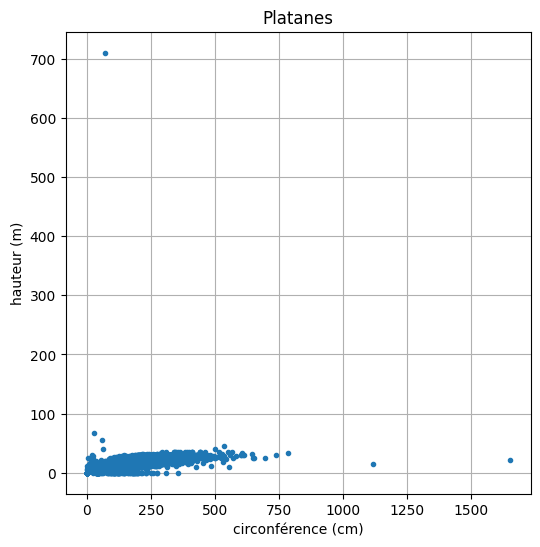

In [383]:

fig = plt.figure(figsize=(6, 6))
plt.plot(df.circonference_cm, df.hauteur_m, '.')
plt.grid()
plt.xlabel('circonférence (cm)')
plt.ylabel('hauteur (m)')
plt.title('Platanes')


In [384]:

df = df[(df.circonference_cm < 1000) & (df.hauteur_m < 100)].copy()

## Méthode du Z-score

Le z-score mesure de combien d'écart-types une valeur est éloigné de la moyenne de la variable. 

On considère qu'un z-score supérieur à 2 ou 3 correspond à un outlier.

In [385]:
from scipy import stats
df['z_circonference'] = stats.zscore(df.circonference_cm)
df['z_hauteur'] = stats.zscore(df.hauteur_m)

Text(0.5, 1.0, 'hauteur - z-score')

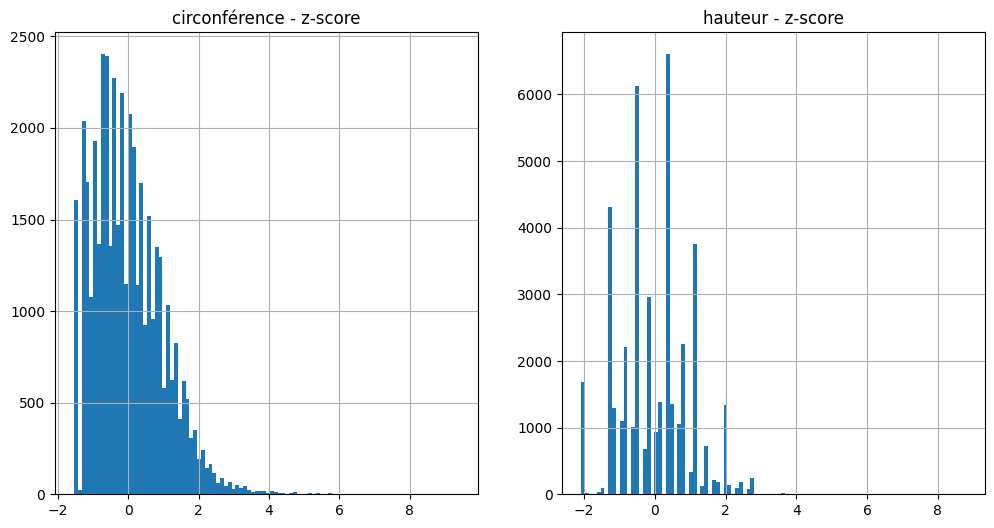

In [386]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
df.z_circonference.hist(bins = 100)
ax.grid(True, which = 'both')
ax.set_title('circonférence - z-score')
ax = fig.add_subplot(1, 2, 2)
df.z_hauteur.hist(bins = 100)
ax.grid(True, which = 'both')
ax.set_title('hauteur - z-score')


Donc en fonction du seuil d'ecart-type par rapport a la moyenne de la variable on aura un nombre plus ou moins important d'outliers


In [387]:
# 2 ecart type
print(f"2 ecart type - circonference:", df[df.z_circonference > 2].shape[0], "arbres\tcirconference max:", np.max(df[df.z_circonference < 2].circonference_cm) , "cm" )
print(f"2 ecart type - hauteur:", df[df.z_hauteur > 2].shape[0], "arbres\thauteur max:", np.max(df[df.z_hauteur < 2].hauteur_m) , "m" )
print()
# 3 ecart type
print(f"3 ecart type - circonference:", df[df.z_circonference > 3].shape[0], "arbres\tcirconference max:", np.min(df[df.z_circonference > 3].circonference_cm) , "cm" )
print(f"3 ecart type - hauteur:", df[df.z_hauteur > 3].shape[0], "arbres\thauteur max:", np.min(df[df.z_hauteur > 3].hauteur_m) , "m" )



2 ecart type - circonference: 1429 arbres	circonference max: 254.0 cm
2 ecart type - hauteur: 793 arbres	hauteur max: 25.0 m

3 ecart type - circonference: 349 arbres	circonference max: 327.0 cm
3 ecart type - hauteur: 33 arbres	hauteur max: 32.0 m


## Methode IQR

In [388]:
import numpy as np
iqr = np.quantile(df.hauteur_m, q=[0.25, 0.75])
limite_basse = iqr[0] - 1.5*(iqr[1] - iqr[0])
limite_haute = iqr[1] + 1.5*(iqr[1] - iqr[0])

print("limite_haute hauteur:", limite_haute)
print("limite_basse hauteur:", limite_basse)


limite_haute hauteur: 30.5
limite_basse hauteur: -5.5


In [389]:
iqr = np.quantile(df.circonference_cm, q=[0.25, 0.75])
limite_basse = iqr[0] - 1.5*(iqr[1] - iqr[0])
limite_haute = iqr[1] + 1.5*(iqr[1] - iqr[0])

print("limite_haute circonference:", limite_haute)
print("limite_basse circonference:", limite_basse)


limite_haute circonference: 305.0
limite_basse circonference: -95.0


## Traitement des outliers

Montrons que prendre le log de la variable permet de reduire fortement sa dispersion et donc de conserver les valeurs outliers lorsque l'on les considère valides.

La variable circonference_cm semble avoir plus d'outliers.



In [390]:
# toujours rajouter 1 a une variable positive quand on prend son log pour eviter le log(0) 
df['log_circonference'] = np.log(df.circonference_cm + 1)
df['z_circonference_log'] = stats.zscore(df.log_circonference)

# z-score
print(f"2 ecart type - circonference:", df[df.z_circonference_log > 2].shape[0], "arbres\tcirconference max:", np.min(df[df.z_circonference_log > 2].circonference_cm) , "cm" )
print(f"3 ecart type - circonference:", df[df.z_circonference_log > 3].shape[0], "arbres\tcirconference max:", np.min(df[df.z_circonference_log > 3].circonference_cm)  )


2 ecart type - circonference: 2 arbres	circonference max: 740.0 cm
3 ecart type - circonference: 0 arbres	circonference max: nan


Il n'y a plus que 2 arbres  qui soient au dela de 2 ecart type.

Regardons aussi les historgrammes de circonference-cm et de son log

Text(0.5, 1.0, 'log circonference')

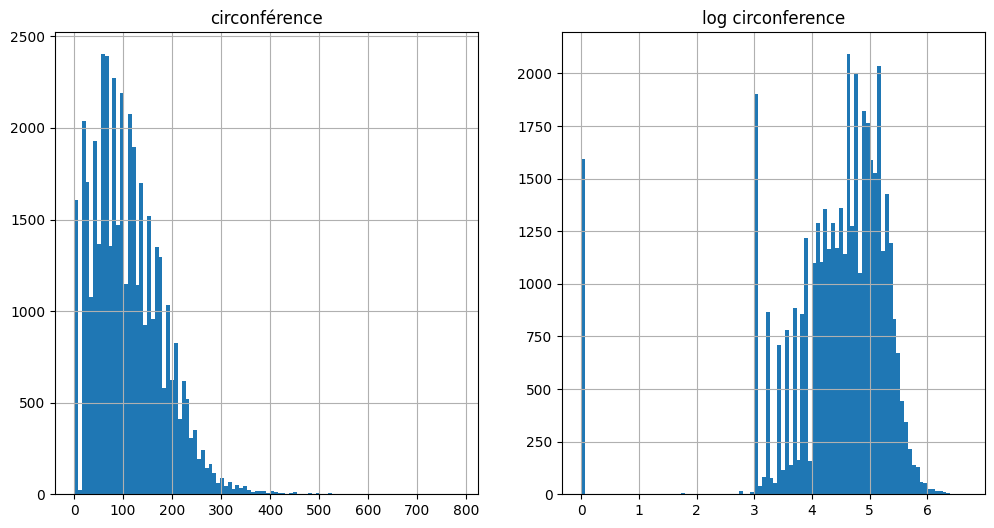

In [391]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
df.circonference_cm.hist(bins = 100)
ax.grid(True, which = 'both')
ax.set_title('circonférence')
ax = fig.add_subplot(1, 2, 2)
df.log_circonference.hist(bins = 100)
ax.grid(True, which = 'both')
ax.set_title('log circonference')


on observe bien que l'histogramme est plus concentré autour de la valeur moyenne de la variable. L'effet des outliers est donc presque entièrement compemsé.

##  Discretiser la variable

En utilisant les methodes qcut et cut de pandas

1. qcut va scinder la variable en intervalles de volume sensiblement égales en fonction de leur fréquence 




In [392]:
df['hauteur_qcut'] = pd.qcut(df.hauteur_m, 4, labels=[1,2,3, 4])
data = df.hauteur_qcut.value_counts()

<BarContainer object of 4 artists>

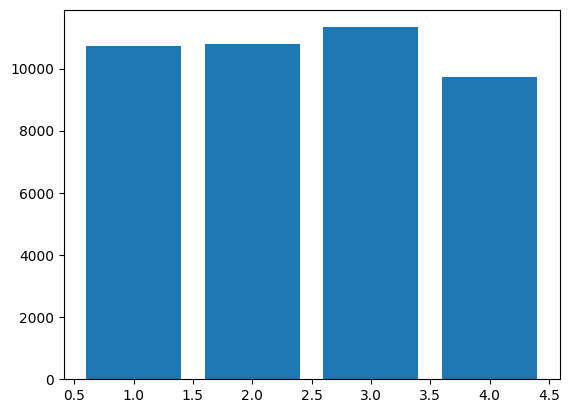

In [393]:
fig, ax = plt.subplots()
ax.bar(data.index, data.values, label= data.index)

2. cut va scinder les données en intervalles de meme taille 

In [394]:
df['hauteur_cut'] = pd.cut(df.hauteur_m, 3, labels=["petit", "moyen", "grand"])
data = df.hauteur_cut.value_counts()


<BarContainer object of 3 artists>

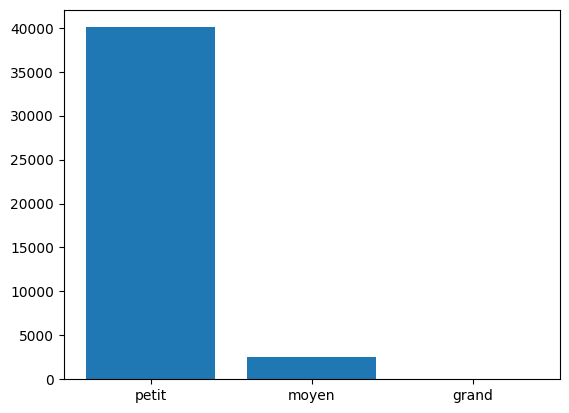

In [395]:
fig, ax = plt.subplots()
ax.bar(data.index, data.values, label= data.index)

# Recapitulons les transformations sur tout le corpus

- MinMax Scaler
- Z-score scaler
- Log 


In [396]:
df = pd.read_csv(dataset_url)
df = df[df.libelle_francais == 'Platane'].copy()

/var/folders/31/b9pwgxyd4rz86p81hzwb44bm0000gn/T/ipykernel_25236/274982043.py:1: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_url)


In [397]:
# enlevons les données manquantes

df = df[~df.stade_de_developpement.isna() & (df.circonference_cm !=  0) & (df.hauteur_m != 0) & (df.circonference_cm < 1000) & (df.hauteur_m < 100)].copy()
df.shape

(39135, 16)

In [398]:
# MinMax


from sklearn.preprocessing import StandardScaler, MinMaxScaler
minmax_scaler = MinMaxScaler()
df['hauteur_minmax'] = minmax_scaler.fit_transform(df.hauteur_m.values.reshape(-1, 1))
df['circonference_minmax'] = minmax_scaler.fit_transform(df.circonference_cm.values.reshape(-1, 1))

# Z-score
standard_scaler = StandardScaler()
df['hauteur_standard'] = standard_scaler.fit_transform(df.hauteur_m.values.reshape(-1, 1))
df['circonference_standard'] = standard_scaler.fit_transform(df.circonference_cm.values.reshape(-1, 1))

# log
df['circonference_log'] = np.log(df.circonference_cm + 1)
df['hauteur_log'] = np.log(df.hauteur_m + 1)

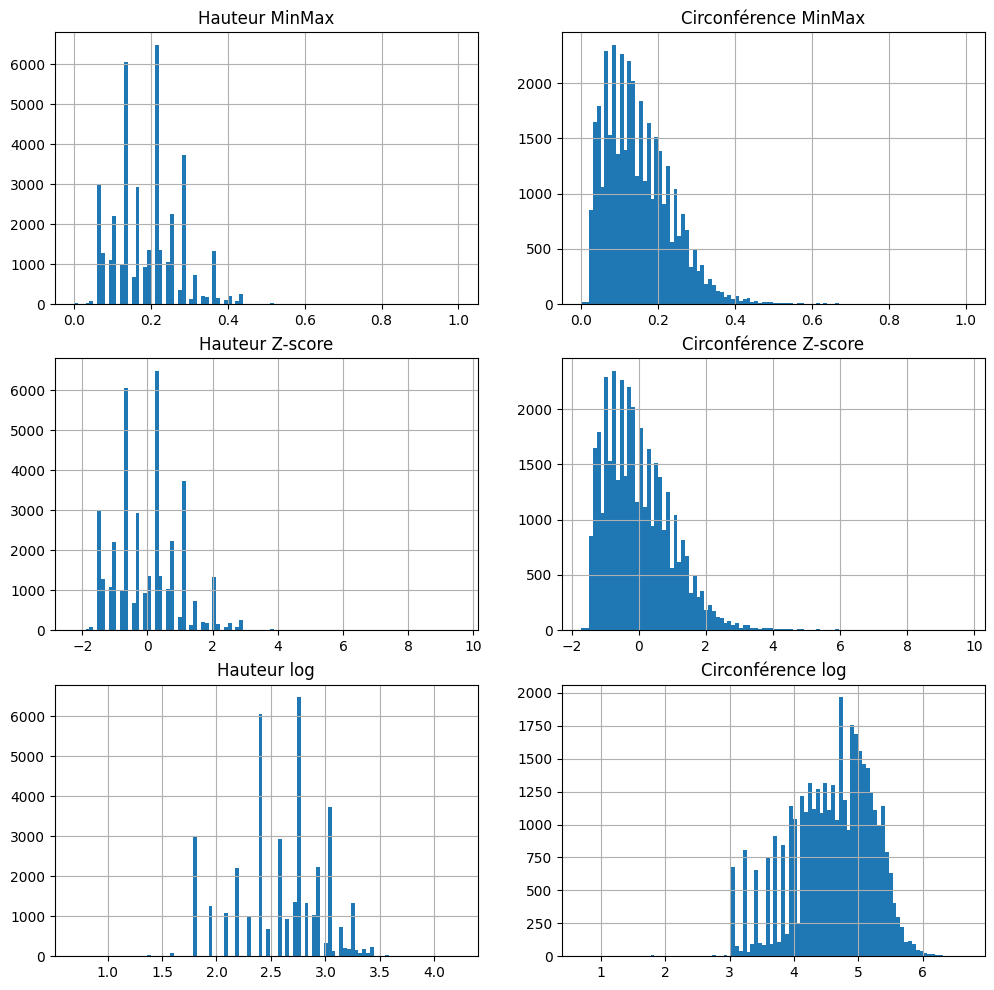

In [399]:


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(3,2, 1)
ax.hist(df.hauteur_minmax, bins = 100)
ax.set_title('Hauteur MinMax')
ax.grid()

ax = fig.add_subplot(3,2, 2)
ax.hist(df.circonference_minmax, bins = 100)
ax.set_title('Circonférence MinMax')
ax.grid()

ax = fig.add_subplot(3,2, 3)
ax.hist(df.hauteur_standard, bins = 100)
ax.set_title('Hauteur Z-score')
ax.grid()

ax = fig.add_subplot(3,2, 4)
ax.hist(df.circonference_standard, bins = 100)
ax.set_title('Circonférence Z-score')
ax.grid()

ax = fig.add_subplot(3,2, 5)
ax.hist(df.hauteur_log, bins = 100)
ax.set_title('Hauteur log')
ax.grid()

ax = fig.add_subplot(3,2, 6)
ax.hist(df.circonference_log, bins = 100)
ax.set_title('Circonférence log')
ax.grid()

plt.show()
